<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/3_%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D1%8F%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Функции активации в нейронных сетях  
## 1. Сигмоида  

Сигмоида является одной из классических функций активации, широко используемых в нейронных сетях. Однако её применение в глубоких нейронных сетях требует осторожности из-за ряда присущих ей ограничений. В данном разделе рассматриваются основные свойства сигмоиды, её математические характеристики и особенности использования.  

Сигмоидой называют любую S-образную функцию. Наиболее известной из них является логистическая функция, определяемая следующим образом:  

$$
\sigma(t) = \frac{e^t}{1 + e^t} = \frac{1}{1 + e^{-t}}.
$$  

Данная функция имеет важное значение в задачах классификации, так как позволяет преобразовать выход нейронной сети в интервал $[0; 1]$, что интерпретируется как вероятность принадлежности к одному из классов.  

### а) Асимптотическое поведение сигмоиды  

Рассмотрим поведение функции $\sigma(t)$ при $t \to +\infty$ и $t \to -\infty$.  

1. При $t \to +\infty$:  
$$
   e^{-t} \to 0 \implies \sigma(t) \to 1.
$$  

2. При $t \to -\infty$:  
$$
   e^{-t} \to +\infty \implies \sigma(t) \to 0.
$$  

Таким образом, сигмоида имеет горизонтальные асимптоты при $y = 0$ и $y = 1$.  

### б) Связь между $\sigma(t)$ и $\sigma(-t)$  

Исследуем связь между значениями функции $\sigma(t)$ и $\sigma(-t)$:  

$$
\sigma(-t) = \frac{1}{1 + e^{t}} = \frac{1 + e^{t} - e^{t}}{1 + e^{t}} = 1 - \sigma(t).
$$  

Следовательно, $\sigma(-t) = 1 - \sigma(t)$.  

### в) Связь между $\sigma(t)$ и её производной $\sigma'(t)$  

Производная сигмоиды может быть выражена через саму функцию:  

$$
\sigma'(t) = \frac{d}{dt} \left( \frac{e^t}{1 + e^t} \right) = \frac{e^t (1 + e^t) - e^t \cdot e^t}{(1 + e^t)^2} = \frac{e^t}{(1 + e^t)^2} = \sigma(t) \cdot (1 - \sigma(t)).
$$  

Таким образом, $\sigma'(t) = \sigma(t) \cdot (1 - \sigma(t))$.  

### г) Значения $\sigma(0)$ и $\sigma'(0)$  

Вычислим значения функции и её производной в точке $t = 0$:  

1. $\sigma(0)$:  
$$
   \sigma(0) = \frac{1}{1 + e^{-0}} = 0.5.
$$  

2. $\sigma'(0)$:  
$$
   \sigma'(0) = \sigma(0) \cdot (1 - \sigma(0)) = 0.5 \cdot 0.5 = 0.25.
$$  

### д) Обратная функция $\sigma^{-1}(t)$  

Найдём обратную функцию для сигмоиды:  

$$
y = \frac{1}{1 + e^{-t}} \implies e^{-t} = \frac{1 - y}{y} \implies t = \ln \left( \frac{y}{1 - y} \right).
$$  

Таким образом, обратная функция имеет вид:  

$$
\sigma^{-1}(t) = \ln \left( \frac{t}{1 - t} \right).
$$  

Эта величина, известная как логит, часто используется в задачах классификации для прогнозирования вероятностей.  

### е) Связь между $[ \ln \sigma(t) ]'$ и $\sigma(-t)$  

Рассмотрим производную логарифма сигмоиды:  

$$
[ \ln \sigma(t) ]' = \frac{1}{\sigma(t)} \cdot \sigma'(t) = \frac{1}{\sigma(t)} \cdot \sigma(t) \cdot (1 - \sigma(t)) = 1 - \sigma(t) = \sigma(-t).
$$  

Таким образом, $[ \ln \sigma(t) ]' = \sigma(-t)$.  

### ё) Графики функций $\sigma(t)$ и $\sigma'(t)$  

График сигмоиды имеет S-образную форму с асимптотами при $y = 0$ и $y = 1$. Производная сигмоиды $\sigma'(t)$ представляет собой симметричный "холмик" с максимумом в точке $t = 0$ (Рис. 1).  


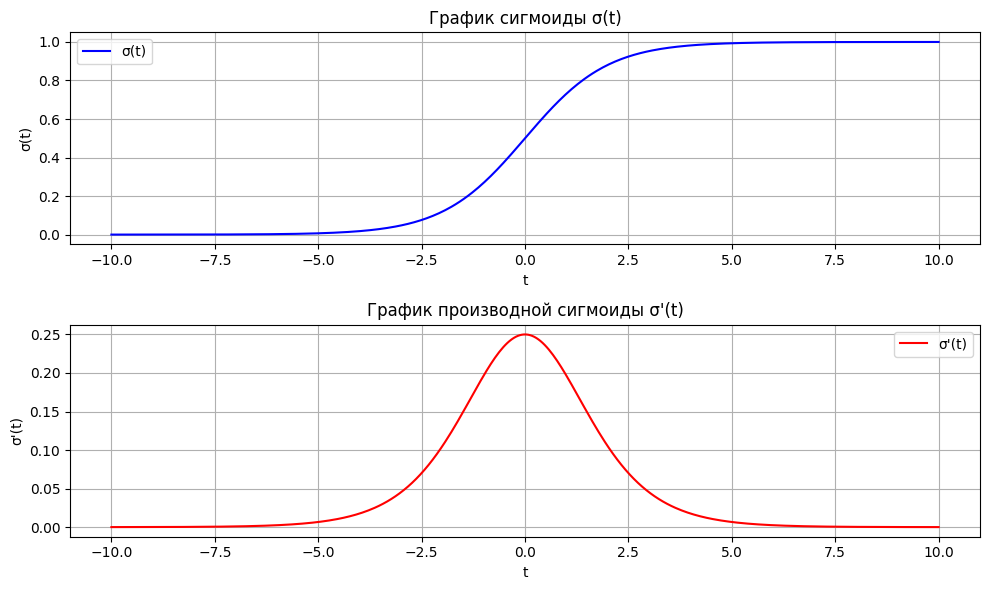

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Определение сигмоиды
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# Определение производной сигмоиды
def sigmoid_derivative(t):
    return sigmoid(t) * (1 - sigmoid(t))

# Создание массива значений t
t = np.linspace(-10, 10, 400)

# Вычисление значений сигмоиды и её производной
sigma_t = sigmoid(t)
sigma_prime_t = sigmoid_derivative(t)

# Построение графиков
plt.figure(figsize=(10, 6))

# График сигмоиды
plt.subplot(2, 1, 1)
plt.plot(t, sigma_t, label="σ(t)", color="blue")
plt.title("График сигмоиды σ(t)")
plt.xlabel("t")
plt.ylabel("σ(t)")
plt.grid(True)
plt.legend()

# График производной сигмоиды
plt.subplot(2, 1, 2)
plt.plot(t, sigma_prime_t, label="σ'(t)", color="red")
plt.title("График производной сигмоиды σ'(t)")
plt.xlabel("t")
plt.ylabel("σ'(t)")
plt.grid(True)
plt.legend()

# Отображение графиков
plt.tight_layout()
plt.show()



### ж) Сигмоида как гладкий аналог единичной ступеньки  

При увеличении коэффициента перед $t$ в функции $\sigma(k \cdot t)$ график сигмоиды становится более крутым, приближаясь к форме единичной ступеньки. При $k \to +\infty$ сигмоида практически совпадает с ступенчатой функцией, оставаясь при этом дифференцируемой (Рис. 2).  



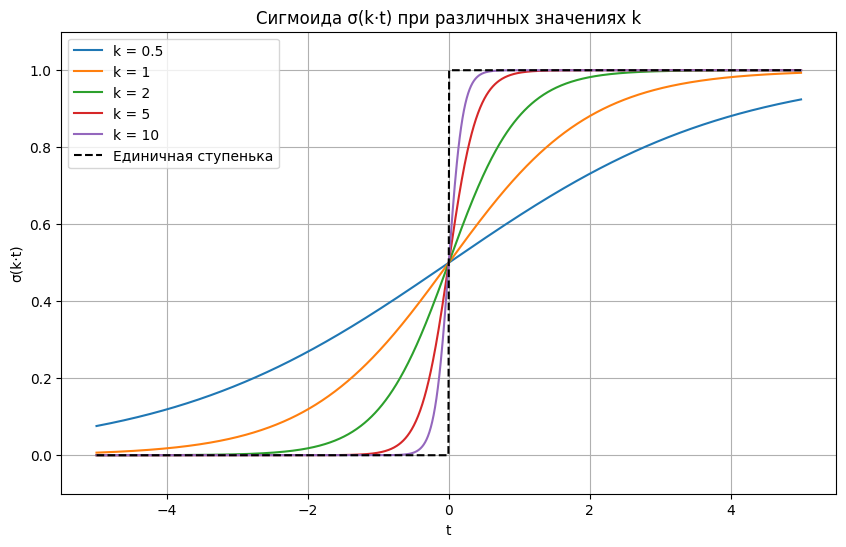

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Определение сигмоиды
def sigmoid(k, t):
    return 1 / (1 + np.exp(-k * t))

# Создание массива значений t
t = np.linspace(-5, 5, 1000)

# Различные значения коэффициента k
k_values = [0.5, 1, 2, 5, 10]

# Построение графиков
plt.figure(figsize=(10, 6))

for k in k_values:
    plt.plot(t, sigmoid(k, t), label=f"k = {k}")

# Добавление единичной ступеньки (функции Хевисайда)
plt.plot(t, np.heaviside(t, 0.5), label="Единичная ступенька", linestyle="--", color="black")

# Настройка графика
plt.title("Сигмоида σ(k·t) при различных значениях k")
plt.xlabel("t")
plt.ylabel("σ(k·t)")
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

Таким образом, сигмоида является гладким аналогом единичной ступеньки, что делает её полезной в задачах, где требуется дифференцируемость функции активации.  




### з) Формулы для forward pass и backward pass через слой с сигмоидой  

Сигмоида является элементом нейронной сети, не имеющим обучаемых параметров. Поэтому прямой (forward pass) и обратный (backward pass) проходы через слой с сигмоидой выполняются следующим образом.  

1. **Прямой проход (forward pass):**  
   Выход слоя вычисляется по формуле:  
$$
   o = \sigma(h),
$$  
   где $h$ — входной сигнал слоя, а $\sigma(h)$ — значение сигмоиды.  

2. **Обратный проход (backward pass):**  
   Градиент по входному сигналу $h$ вычисляется с использованием производной сигмоиды:  
$$
   \frac{\partial L}{\partial h} = \sigma(h) \cdot (1 - \sigma(h)) \cdot \frac{\partial L}{\partial o},
$$  
   где $\frac{\partial L}{\partial o}$ — градиент по выходу слоя, полученный от последующих слоёв.  

Таким образом, обратный проход через слой с сигмоидой учитывает как градиент от последующих слоёв, так и производную самой сигмоиды.  

### и) Максимальное значение производной сигмоиды и проблема затухания градиента  

Производная сигмоиды $\sigma'(t)$ выражается как:  
$$
\sigma'(t) = \sigma(t) \cdot (1 - \sigma(t)).
$$  
Рассмотрим функцию $f(\sigma) = \sigma \cdot (1 - \sigma)$.



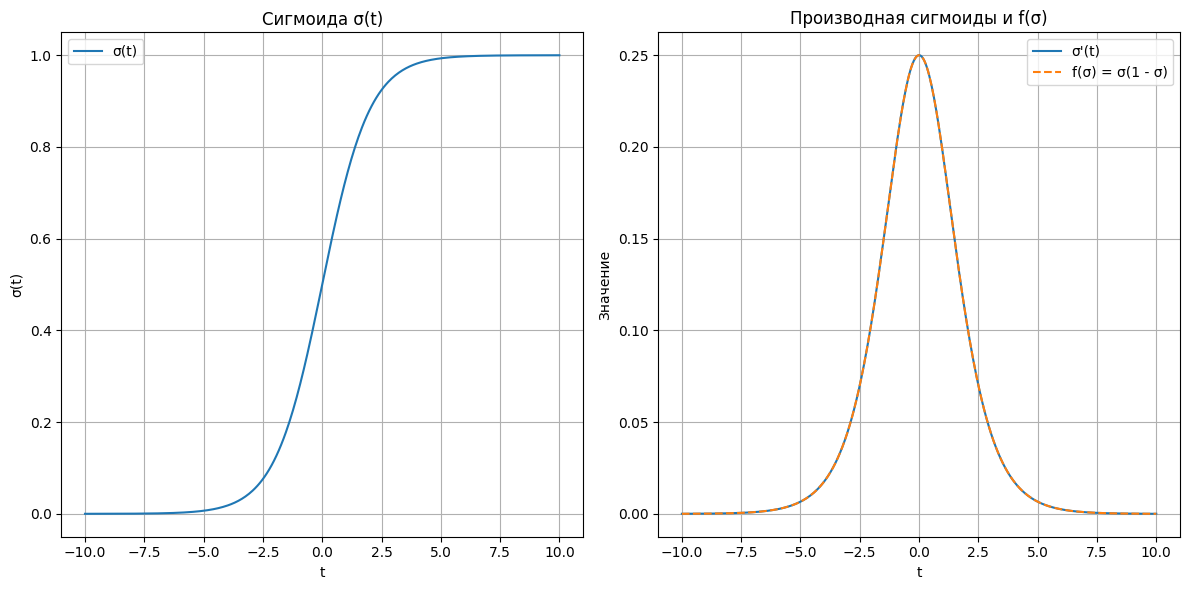

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем сигмоиду и её производную
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def sigmoid_derivative(t):
    sigma = sigmoid(t)
    return sigma * (1 - sigma)

# Определяем функцию f(sigma)
def f(sigma):
    return sigma * (1 - sigma)

# Создаем диапазон значений t
t = np.linspace(-10, 10, 400)
sigma_values = sigmoid(t)
sigma_derivative_values = sigmoid_derivative(t)
f_values = f(sigma_values)

# Визуализация
plt.figure(figsize=(12, 6))

# График сигмоиды
plt.subplot(1, 2, 1)
plt.plot(t, sigma_values, label='σ(t)')
plt.title('Сигмоида σ(t)')
plt.xlabel('t')
plt.ylabel('σ(t)')
plt.grid(True)
plt.legend()

# График производной сигмоиды и функции f(σ)
plt.subplot(1, 2, 2)
plt.plot(t, sigma_derivative_values, label="σ'(t)")
plt.plot(t, f_values, label='f(σ) = σ(1 - σ)', linestyle='--')
plt.title("Производная сигмоиды и f(σ)")
plt.xlabel('t')
plt.ylabel('Значение')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

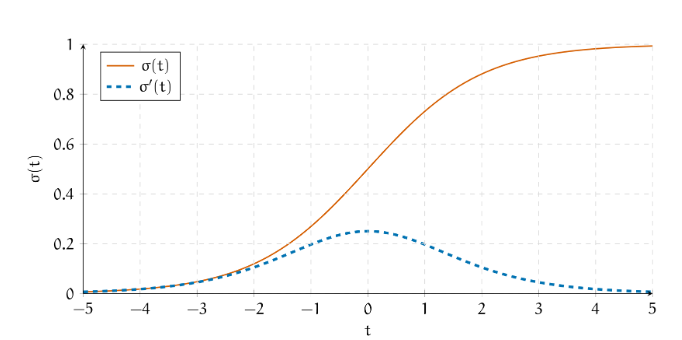


Это парабола, ветви которой направлены вниз. Её экстремум находится в точке:  
$$
f'(\sigma) = 1 - 2\sigma = 0 \implies \sigma = 0.5.
$$  
Максимальное значение функции $f(\sigma)$ равно:  
$$
f(0.5) = 0.5 \cdot (1 - 0.5) = 0.25.
$$  
Таким образом, производная сигмоиды принимает значения на интервале $[0; 0.25]$.  


#### Проблема затухания градиента  
При обратном распространении ошибки градиент умножается на производную сигмоиды. Поскольку производная сигмоиды ограничена сверху значением $0.25$, градиент на каждом слое уменьшается. В глубоких нейронных сетях это приводит к тому, что градиенты, доходящие до начальных слоёв, становятся крайне малыми. В результате веса начальных слоёв практически не обновляются, что замедляет или полностью останавливает обучение. Это явление известно как **проблема затухания градиента** (vanishing gradient problem).  

#### Паралич нейронной сети  
По мере обучения нейроны начинают выдавать значения, близкие к $0$ или $1$, где производная сигмоиды стремится к нулю. Это усугубляет проблему затухания градиента, так как градиенты на этих участках становятся ещё меньше. В результате функция потерь стабилизируется, создавая иллюзию сходимости, хотя на самом деле обучение останавливается.  

Для борьбы с этой проблемой в глубоких нейронных сетях вместо сигмоиды используют другие функции активации, такие как ReLU (Rectified Linear Unit), которые не подвержены затуханию градиента.  



### к) Нецентрированность сигмоиды и её влияние на градиентный спуск  

Сигмоида не является центрированной относительно нуля, так как её выход всегда лежит в интервале $[0; 1]$. Это приводит к следующим проблемам при оптимизации:  

1. **Однонаправленность градиентов:**  
   Поскольку выход сигмоиды $o = \sigma(h)$ всегда положителен, градиенты по весам линейного слоя, предшествующего сигмоиде, будут либо все положительными, либо все отрицательными. Это ограничивает направление обновления весов, что замедляет сходимость градиентного спуска.  

2. **Зигзагообразное движение к оптимуму:**  
   Если для разных параметров требуется движение в противоположных направлениях (например, один параметр должен увеличиваться, а другой — уменьшаться), градиенты не смогут одновременно принимать разные знаки. В результате процесс оптимизации будет двигаться зигзагообразно, что увеличивает время достижения оптимума (Рис. 4).  


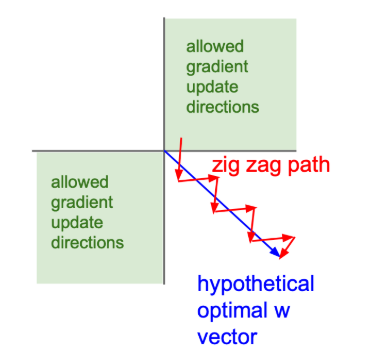


#### Решение проблемы  
Для ускорения сходимости градиентного спуска рекомендуется использовать функции активации, центрированные относительно нуля (например, гиперболический тангенс $\tanh$). Такие функции позволяют градиентам принимать как положительные, так и отрицательные значения, что улучшает направленность обновления весов и ускоряет обучение.  














## 2. Логистические потери и Softmax  

### а) Логистические потери и их визуализация  

Логистическая функция потерь (logloss) для одного наблюдения в задаче бинарной классификации определяется следующим образом:  

$$
\text{logloss} = -\left( y_i \cdot \ln p_i + (1 - y_i) \cdot \ln (1 - p_i) \right),
$$  

где $y_i$ — истинная метка класса (0 или 1), а $p_i = P(y_i = 1 \mid x)$ — предсказанная вероятность принадлежности к классу 1.  

#### Визуализация логистических потерь  
Для $y_i = 1$ функция потерь сводится к $-\ln p_i$, а для $y_i = 0$ — к $-\ln (1 - p_i)$. Графики этих функций представлены на Рис. 1.  

1. **Для $y_i = 1$:**  
   - Если $p_i$ близко к 1, штраф минимален.  
   - Если $p_i$ близко к 0, штраф стремится к бесконечности.  

2. **Для $y_i = 0$:**  
   - Если $p_i$ близко к 0, штраф минимален.  
   - Если $p_i$ близко к 1, штраф стремится к бесконечности.  

#### Роль логарифма  
Логарифм в функции потерь обеспечивает нелинейный штраф за ошибки:  
- Небольшие отклонения $p_i$ от истинного значения штрафуются слабо.  
- Крупные отклонения штрафуются значительно сильнее.  

Если заменить логарифм на линейную функцию, например, $-(y_i \cdot p_i + (1 - y_i) \cdot (1 - p_i))$, возникнут следующие проблемы:  
1. **Отсутствие нелинейности:** Штраф за ошибки будет одинаковым на всём диапазоне $p_i$.  
2. **Сложность оптимизации:** Линейная функция потерь менее чувствительна к малым изменениям $p_i$.  
3. **Потеря интерпретации:** Выход модели нельзя будет интерпретировать как вероятность $P(y = 1 \mid x)$.  



### б) Функция потерь для задачи классификации  

Рассмотрим задачу классификации с тремя наблюдениями:  
- Первое наблюдение: кит ($y_1 = 1$).  
- Второе и третье наблюдения: муравьи ($y_2 = 0$, $y_3 = 0$).  

Модель логистической регрессии задаётся следующим образом:  
$$
z_i = w_0 + w_1 x_i, \quad p_i = P(y_i = 1 \mid x) = \sigma(z_i) = \frac{1}{1 + e^{-(w_0 + w_1 x_i)}},
$$  
где $x_i$ — номер наблюдения.  

Функция потерь (logloss) для данной задачи:  
$$
\text{logloss} = -\frac{1}{3} \left( \ln p_1 + \ln (1 - p_2) + \ln (1 - p_3) \right).
$$  

Подставляя выражения для $p_i$, получаем:  
$$
\text{logloss} = -\frac{1}{3} \left( \ln \sigma(w_0 + w_1) + \ln \sigma(-(w_0 + 2w_1)) + \ln \sigma(-(w_0 + 3w_1)) \right).
$$  

Здесь использовано свойство сигмоиды: $\sigma(-t) = 1 - \sigma(t)$.  



### в) Минимизация функции потерь  

Данная выборка является линейно-разделимой. Минимум функции потерь достигается, когда:  
- Для кита ($y_1 = 1$): $p_1 \to 1$.  
- Для муравьёв ($y_2 = 0$, $y_3 = 0$): $p_2 \to 0$, $p_3 \to 0$.  

Это соответствует случаю, когда сигмоида идеально разделяет классы.  



### г) Многоклассовая классификация с Softmax  

Если добавляется третий класс (бобёр), задача становится многоклассовой. В этом случае выход нейронной сети специфицируется следующим образом:  

1. **Выходной слой:**  
   - Количество нейронов равно количеству классов $K$.  
   - На выходе получается вектор $(z_1, z_2, \dots, z_K)$, где $z_k = w_k^T x$.  

2. **Функция Softmax:**  
$$
   \text{Softmax}(z_k) = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}}.
$$  
   Эта функция преобразует выходы нейронной сети в вероятности, принадлежащие интервалу $[0; 1]$ и суммирующиеся в единицу (Рис. 2).  

3. **Функция потерь:**  
   Для многоклассовой классификации используется обобщённая логистическая функция потерь:  
$$
   \text{logloss} = -\frac{1}{n} \sum_{i=1}^n \sum_{k=1}^K [y_i = k] \cdot \ln \left( \frac{e^{w_k^T x_i}}{\sum_{j=1}^K e^{w_j^T x_i}} \right),
$$  
   где $[y_i = k]$ — индикаторная функция, равная 1, если $y_i = k$, и 0 в противном случае.  

#### Калибровка вероятностей  
Выход Softmax можно интерпретировать как вероятность, если модель откалибрована. Калиброванная модель удовлетворяет условию:  
$$
P(y = k \mid p_k \approx p) = p,
$$  
где $p$ — предсказанная вероятность, а $P(y = k \mid p_k \approx p)$ — доля объектов с истинной меткой $k$ среди объектов, для которых предсказанная вероятность близка к $p$.  

### д) Прогнозирование вероятностей с использованием Softmax  

После обучения нейронной сети для задачи классификации на три класса (кит, муравей, бобёр) выходы слоя, предшествующего Softmax, для двух наблюдений составили:  
1. Первое наблюдение: $(1, -2, 0)$.  
2. Второе наблюдение: $(0.5, -1, 0)$.  

Применим функцию Softmax для вычисления вероятностей каждого класса:  

1. **Для первого наблюдения:**  
$$
   \text{Softmax}(1, -2, 0) = \left( \frac{e^1}{e^1 + e^{-2} + e^0}, \frac{e^{-2}}{e^1 + e^{-2} + e^0}, \frac{e^0}{e^1 + e^{-2} + e^0} \right) \approx (0.7, 0.03, 0.27).
$$  

2. **Для второго наблюдения:**  
$$
   \text{Softmax}(0.5, -1, 0) = \left( \frac{e^{0.5}}{e^{0.5} + e^{-1} + e^0}, \frac{e^{-1}}{e^{0.5} + e^{-1} + e^0}, \frac{e^0}{e^{0.5} + e^{-1} + e^0} \right) \approx (0.55, 0.12, 0.33).
$$  

Таким образом, вероятности для каждого класса:  
- Первое наблюдение: кит — 70%, муравей — 3%, бобёр — 27%.  
- Второе наблюдение: кит — 55%, муравей — 12%, бобёр — 33%.  



### е) Вычисление logloss-ошибки  

Предположим, что первое наблюдение соответствует киту ($y_1 = (1, 0, 0)$), а второе — бобру ($y_2 = (0, 0, 1)$). Логистическая функция потерь (logloss) для этих наблюдений вычисляется следующим образом:  

$$
\text{logloss} = -\frac{1}{2} \left( \ln 0.7 + \ln 0.33 \right).
$$  



### ё) Softmax как сглаженный аналог arg max  

Функция Softmax является сглаженной версией arg max, так как она преобразует входные значения в вероятности, сохраняя их относительные различия. В отличие от arg max, которая возвращает строгое максимальное значение (единицу для максимального элемента и нули для остальных), Softmax:  
1. **Усиливает различия:** Значения, значительно меньшие максимального, приближаются к нулю.  
2. **Сохраняет дифференцируемость:** В отличие от arg max, Softmax является гладкой функцией, что позволяет использовать её в градиентных методах оптимизации.  



### ж) Связь между сигмоидой и Softmax для двух классов  

Рассмотрим два подхода к задаче бинарной классификации:  
1. **Один выход с сигмоидой:**  
$$
   \sigma(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z}.
$$  
   В этом случае вероятность класса 1 равна $\sigma(z)$, а класса 0 — $1 - \sigma(z)$.  

2. **Два выхода с Softmax:**  
$$
   \text{Softmax}(z_1, z_2) = \left( \frac{e^{z_1}}{e^{z_1} + e^{z_2}}, \frac{e^{z_2}}{e^{z_1} + e^{z_2}} \right).
$$  
   Если положить $z_1 = 0$ и $z_2 = z$, то:  
$$
   \text{Softmax}(0, z) = \left( \frac{1}{1 + e^z}, \frac{e^z}{1 + e^z} \right) = \left( 1 - \sigma(z), \sigma(z) \right).
$$  
   Таким образом, Softmax для двух классов эквивалентен использованию сигмоиды, где первый выход соответствует вероятности класса 0, а второй — класса 1.  



### з) Инвариантность Softmax относительно сдвига  

Функция Softmax инвариантна относительно добавления константы ко всем её аргументам:  
$$
\text{Softmax}(z_1 + c, z_2 + c, \dots, z_K + c) = \text{Softmax}(z_1, z_2, \dots, z_K).
$$  
Это свойство следует из того, что:  
$$
\frac{e^{z_i + c}}{\sum_{k=1}^K e^{z_k + c}} = \frac{e^c \cdot e^{z_i}}{e^c \cdot \sum_{k=1}^K e^{z_k}} = \frac{e^{z_i}}{\sum_{k=1}^K e^{z_k}}.
$$  

#### Численная устойчивость  
Для предотвращения переполнения при вычислении экспонент используется устойчивая версия Softmax:  
$$
\text{Softmax}(z_1, z_2, \dots, z_K) = \text{Softmax}(z_1 - \max(z), z_2 - \max(z), \dots, z_K - \max(z)).
$$  
Это упрощает вычисления и повышает устойчивость алгоритма.  



### и) Производная logloss по входам Softmax  

Рассмотрим производную функции потерь logloss по входам Softmax. Для одного наблюдения:  
$$
\text{logloss} = -\sum_{k=1}^K y_k \ln p_k,
$$  
где $p_k = \text{Softmax}(z_k)$.  

Производная Softmax:  
$$
\frac{\partial p_i}{\partial z_j} =
\begin{cases}
p_i (1 - p_j), & i = j, \\
-p_i p_j, & i \neq j.
\end{cases}
$$  

Производная logloss по $z_j$:  
$$
\frac{\partial L}{\partial z_j} = -\sum_{k=1}^K y_k \frac{\partial \ln p_k}{\partial z_j} = -\sum_{k=1}^K y_k \frac{1}{p_k} \frac{\partial p_k}{\partial z_j}.
$$  

Подставляя производную Softmax, получаем:  
$$
\frac{\partial L}{\partial z_j} = -y_j (1 - p_j) + \sum_{k \neq j} y_k p_j = -y_j + p_j \sum_{k=1}^K y_k = p_j - y_j.
$$  

Таким образом, производная logloss по входам Softmax равна разности между предсказанными вероятностями и истинными метками:  
$$
\frac{\partial L}{\partial z} = p - y.
$$  

Для множества наблюдений производная вычисляется как сумма производных для каждого наблюдения.  




## 3. Разные выходы нейросети и правдоподобие  

### а) Бинарная классификация  

Для решения задачи бинарной классификации, где требуется предсказать вероятность принадлежности объекта к одному из двух классов, последний слой нейронной сети должен состоять из одного нейрона. К выходу этого нейрона применяется сигмоидная функция активации:  

$$
p = \sigma(z) = \frac{1}{1 + e^{-z}},
$$  

где $p$ — вероятность принадлежности к первому классу. Вероятность принадлежности ко второму классу вычисляется как $1 - p$.  



### б) Многоклассовая классификация  

Для задачи классификации на $K$ классов последний слой нейронной сети должен содержать $K$ нейронов. К выходам этих нейронов применяется функция Softmax:  

$$
p_k = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}},
$$  

где $p_k$ — вероятность принадлежности объекта к классу $k$. Таким образом, выходы нейронной сети интерпретируются как вероятности для каждого из $K$ классов.  



### в) Регрессия для прогнозирования рейтинга фильма  

Для задачи прогнозирования непрерывного значения, такого как рейтинг фильма на шкале от 0 до 10, последний слой нейронной сети должен состоять из одного нейрона. В этом случае можно использовать линейную функцию активации (т.е. отсутствие функции активации) или ограничить выход нейрона на интервале $[0; 10]$ с помощью подходящей функции активации.  

Например, можно использовать масштабированную сигмоиду:  

$$
f(z) = 10 \cdot \sigma(z) = \frac{10}{1 + e^{-z}}.
$$  

Однако сигмоида может быть неоптимальной, если данные распределены неравномерно (например, большинство рейтингов сосредоточено в диапазоне 6–10). В таком случае можно использовать другие функции активации, такие как гиперболический тангенс с масштабированием:  

$$
f(z) = 5 \cdot (\tanh(z) + 1).
$$  



### г) Мультиклассификация с пересекающимися классами  

Если каждая новость может принадлежать к нескольким категориям (спортивная, политическая, экономическая), задача называется мультиклассификацией с пересекающимися классами. Для решения такой задачи можно использовать следующие подходы:  

1. **Отдельные нейронные сети для каждого класса:**  
   Для каждого класса обучается отдельная нейронная сеть, которая предсказывает вероятность принадлежности новости к данному классу. Однако этот подход неэффективен, так как нейронные сети могут дублировать вычисления на начальных слоях.  

2. **Общая архитектура с несколькими выходами:**  
   Нейронная сеть имеет $K$ выходов, где $K$ — количество классов. К каждому выходу применяется сигмоидная функция активации:  

$$
   p_k = \sigma(z_k),
$$  

   где $p_k$ — вероятность принадлежности новости к классу $k$.  

   Функция потерь представляет собой сумму логистических потерь для каждого класса:  

$$
   \text{loss} = \lambda_1 \cdot \text{logloss}_1 + \lambda_2 \cdot \text{logloss}_2 + \lambda_3 \cdot \text{logloss}_3,
$$  

   где $\lambda_i$ — весовые коэффициенты, позволяющие учитывать важность ошибок для каждого класса.  

3. **Использование предобученных моделей (тушек и голов):**  
   Для текстовых данных часто используют предобученные модели (например, BERT), которые извлекают векторные представления (эмбеддинги) текста. Затем эти эмбеддинги передаются в простые модели (головы), которые дообучаются для конкретной задачи.  



### д) Задача обнаружения и классификации объектов  

Для задачи обнаружения и классификации объектов на изображении (например, уток и чаек) выход нейронной сети должен содержать информацию о местоположении объекта (bounding box) и его классе.  

1. **Спецификация выхода:**  
   - **Координаты bounding box:** Четыре числа, описывающие координаты угла прямоугольника, его ширину и высоту.  
   - **Класс объекта:** Вектор вероятностей для каждого класса (например, утка или чайка).  

2. **Функция потерь:**  
   - **Для bounding box:** Используется среднеквадратичная ошибка (MSE) для штрафования отклонений предсказанных координат от истинных.  
   - **Для классификации:** Используется логистическая функция потерь (logloss) для штрафования ошибок классификации.  

   Общая функция потерь представляет собой взвешенную сумму потерь для bounding box и классификации:  

$$
   \text{loss} = \lambda_{\text{bbox}} \cdot \text{MSE} + \lambda_{\text{class}} \cdot \text{logloss}.
$$  

   Весовые коэффициенты $\lambda_{\text{bbox}}$ и $\lambda_{\text{class}}$ позволяют балансировать важность ошибок локализации и классификации.  

### е) Прогнозирование количества лайков с использованием нейронных сетей  

Для задачи прогнозирования количества лайков под фотографиями в Instagram, где количество лайков является целым числом, можно использовать два подхода: инженерный и вероятностный.  

#### 1. Инженерный подход  
Первый подход заключается в округлении выхода нейронной сети и использовании стандартных функций потерь, таких как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE). Однако этот метод имеет недостатки:  
- Округление может привести к потере информации.  
- Функции потерь, такие как MSE и MAE, не учитывают дискретную природу целевой переменной.  

Для улучшения качества прогнозирования можно анализировать ошибки модели и модифицировать функцию потерь, чтобы минимизировать отклонения предсказанных значений от истинных.  

#### 2. Вероятностный подход  
Вероятностный подход основан на предположении о распределении целевой переменной. В данном случае количество лайков можно рассматривать как случайную величину, следующую распределению Пуассона. Это распределение подходит для моделирования событий, происходящих с низкой вероятностью в большом количестве испытаний (например, лайки под фотографиями).  

##### Модель Пуассоновской регрессии  
Пуассоновская регрессия предполагает, что интенсивность $\lambda$ (среднее количество лайков) зависит от характеристик фотографии $x_i$:  

$$
\lambda(x_i) = \langle w, x_i \rangle,
$$  

где $w$ — вектор весов модели. В качестве $\lambda(x_i)$ можно использовать нейронную сеть или градиентный бустинг над деревьями (например, в библиотеке CatBoost).  

##### Функция правдоподобия и потерь  
Для распределения Пуассона вероятность наблюдения $y_i$ лайков под фотографией $x_i$ равна:  

$$
P(y_i = k) = \frac{e^{-\lambda(x_i)} \cdot (\lambda(x_i))^k}{k!}.
$$  

Функция правдоподобия для всей выборки:  

$$
L(w) = \prod_{i=1}^n \frac{e^{-\lambda(x_i)} \cdot (\lambda(x_i))^{y_i}}{y_i!}.
$$  

Логарифмируя и упрощая, получаем логарифмическую функцию правдоподобия:  

$$
\ln L(w) = \sum_{i=1}^n \left( y_i \ln \lambda(x_i) - \lambda(x_i) - \ln(y_i!) \right).
$$  

Исключая константные слагаемые и меняя знак, получаем функцию потерь для минимизации:  

$$
\text{loss}(w) = \sum_{i=1}^n \left( \lambda(x_i) - y_i \ln \lambda(x_i) \right).
$$  

##### Прогнозирование  
Прогноз модели можно получить как значение $k$, максимизирующее вероятность $P(y = k)$:  

$$
\hat{y} = \arg\max_{k \in \mathbb{N}} P(y = k).
$$  

На практике перебор значений $k$ ограничивается разумными пределами, так как распределение Пуассона имеет бесконечный носитель.  

#### 3. Байесовский подход  
Вероятностный подход можно расширить до байесовских методов, где априорные распределения на параметры модели позволяют учитывать дополнительные знания о данных. Например, регуляризация в байесовских моделях естественным образом возникает из априорных распределений.  



## 4. Гиперболический тангенс  

Функция гиперболического тангенса определяется следующим образом:  

$$
f(t) = \tanh(t) = \frac{2}{1 + e^{-2t}} - 1.
$$  

Эта функция широко используется в нейронных сетях в качестве функции активации. В данном разделе рассматриваются её свойства, производная, а также особенности использования в нейронных сетях.  



### а) Асимптотическое поведение гиперболического тангенса  

Исследуем поведение функции $\tanh(t)$ при $t \to +\infty$ и $t \to -\infty$:  

1. **При $t \to +\infty$:**  
$$
   e^{-2t} \to 0 \implies \tanh(t) \to 1.
$$  

2. **При $t \to -\infty$:**  
$$
   e^{-2t} \to +\infty \implies \tanh(t) \to -1.
$$  

Таким образом, гиперболический тангенс имеет горизонтальные асимптоты при $y = 1$ и $y = -1$.  



### б) Связь между $\tanh(t)$ и его производной  

Производная гиперболического тангенса выражается через саму функцию:  

$$
f'(t) = 1 - \tanh^2(t).
$$  

Графики функции $\tanh(t)$ и её производной $f'(t)$ представлены на Рис. 1.  



### в) Формулы для forward pass и backward pass через слой с гиперболическим тангенсом  

Гиперболический тангенс не имеет обучаемых параметров, поэтому прямой и обратный проходы через слой с этой функцией активации выполняются следующим образом:  

1. **Прямой проход (forward pass):**  
$$
   o = \tanh(h),
$$  
   где $h$ — входной сигнал слоя.  

2. **Обратный проход (backward pass):**  
   Градиент по входному сигналу $h$ вычисляется с использованием производной гиперболического тангенса:  
$$
   \frac{\partial L}{\partial h} = (1 - \tanh^2(h)) \cdot \frac{\partial L}{\partial o},
$$  
   где $\frac{\partial L}{\partial o}$ — градиент по выходу слоя, полученный от последующих слоёв.  



### г) Проблема затухания градиента  

Производная гиперболического тангенса $f'(t) = 1 - \tanh^2(t)$ принимает значения на интервале $[0; 1]$. Максимальное значение производной равно $1$ (достигается при $t = 0$).  

Как и в случае с сигмоидой, гиперболический тангенс способствует затуханию градиента, особенно при больших по модулю значениях $t$, где производная близка к нулю. Это может привести к замедлению или остановке обучения глубоких нейронных сетей (проблема затухания градиента).  



### д) Центрированность относительно нуля  

В отличие от сигмоиды, гиперболический тангенс центрирован относительно нуля, так как его выход лежит в интервале $[-1; 1]$. Это свойство улучшает сходимость градиентного спуска, так как градиенты могут принимать как положительные, так и отрицательные значения.  



### е) Практическое использование гиперболического тангенса  

Гиперболический тангенс редко используется в качестве функции активации в скрытых слоях нейронных сетей из-за проблемы затухания градиента. Однако он находит применение в следующих случаях:  

1. **Генерация данных на интервале $[-1; 1]$:**  
   Например, при работе с изображениями, нормализованными на интервал $[-1; 1]$, гиперболический тангенс может использоваться на выходном слое генеративной модели.  

2. **Специфические архитектуры нейронных сетей:**  
   В некоторых архитектурах, таких как LSTM (Long Short-Term Memory), гиперболический тангенс используется для управления потоком информации, так как его выход лежит в ограниченном диапазоне.  






## 5. ReLU и её вариации  

### а) Функция ReLU и её свойства  

Функция активации ReLU (Rectified Linear Unit) определяется следующим образом:  

$$
\text{ReLU}(t) = \max(t, 0).
$$  

#### Производная ReLU  
Производная функции ReLU имеет вид:  

$$
\text{ReLU}'(t) =
\begin{cases}
1, & t \geq 0, \\
0, & t < 0.
\end{cases}
$$  

График функции ReLU и её производной представлен на Рис. 1.  

#### Обратное распространение ошибки  
При обратном распространении ошибки градиент умножается на производную ReLU:  
- Если $t \geq 0$, градиент передаётся без изменений.  
- Если $t < 0$, градиент обнуляется.  

#### Проблема "мёртвых нейронов"  
Если все входы нейрона отрицательны, его выход становится нулевым, и градиент также обнуляется. Это явление называется "мёртвым нейроном" (dying ReLU problem). Для предотвращения этой проблемы рекомендуется инициализировать смещение $b$ положительными значениями.  



### б) Центрированность ReLU относительно нуля  

ReLU не является центрированной относительно нуля, так как её выход лежит в интервале $[0, +\infty)$. Это может замедлять сходимость обучения в глубоких нейронных сетях.  



### в) Функция Leaky ReLU  

Функция Leaky ReLU (LReLU) определяется следующим образом:  

$$
\text{LReLU}(t) =
\begin{cases}
t, & t \geq 0, \\
\alpha \cdot t, & t < 0,
\end{cases}
$$  

где $\alpha$ — небольшой положительный параметр (обычно $\alpha = 0.01$).  

#### Производная Leaky ReLU  
Производная функции LReLU имеет вид:  

$$
\text{LReLU}'(t) =
\begin{cases}
1, & t \geq 0, \\
\alpha, & t < 0.
\end{cases}
$$  

График функции LReLU и её производной представлен на Рис. 2.  

#### Преимущества LReLU  
- Предотвращает проблему "мёртвых нейронов", так как градиент на отрицательных значениях не обнуляется.  
- Сохраняет вычислительную эффективность ReLU.  



### г) Функция ELU  

Функция ELU (Exponential Linear Unit) определяется следующим образом:  

$$
\text{ELU}(t) =
\begin{cases}
t, & t \geq 0, \\
\alpha \cdot (e^t - 1), & t < 0,
\end{cases}
$$  

где $\alpha$ — параметр, обычно равный 1.  

#### Производная ELU  
Производная функции ELU имеет вид:  

$$
\text{ELU}'(t) =
\begin{cases}
1, & t \geq 0, \\
\alpha \cdot e^t, & t < 0.
\end{cases}
$$  

Для $t < 0$ производную можно переписать как $\text{ELU}(t) + \alpha$, что упрощает вычисления.  

График функции ELU и её производной представлен на Рис. 3.  

#### Преимущества ELU  
- На отрицательных значениях функция экспоненциально насыщается, что помогает сохранить разреженность активаций.  
- ELU приблизительно центрирована относительно нуля, что ускоряет сходимость глубоких нейронных сетей.  



### д) Функция SELU  

Функция SELU (Scaled Exponential Linear Unit) определяется следующим образом:  

$$
\text{SELU}(t) = \lambda \cdot
\begin{cases}
t, & t \geq 0, \\
\alpha \cdot (e^t - 1), & t < 0,
\end{cases}
$$  

где $\alpha = 1.67733$ и $\lambda = 1.0507$ — фиксированные параметры, предложенные авторами функции.  

#### Преимущества SELU  
- SELU обладает свойством самонормализации, что позволяет глубоким нейронным сетям сохранять стабильность градиентов без необходимости использования техник, таких как Batch Normalization.  


## 5. ReLU и её вариации (продолжение)  

### д) Нормализация данных и функция SELU  

#### Нормализация данных в машинном обучении  
При обучении линейных моделей градиентным спуском данные часто нормализуются путём вычитания среднего значения и деления на стандартное отклонение. Это улучшает сходимость алгоритма, так как градиентный спуск работает эффективнее, когда признаки имеют одинаковый масштаб.  

#### Нормализация в нейронных сетях  
В нейронных сетях желательно, чтобы выходы каждого слоя также были нормализованы. Это достигается с помощью техник, таких как **нормализация по батчам** (Batch Normalization), которая стабилизирует распределение активаций внутри сети.  

#### Самонормализация SELU  
Функция активации SELU (Scaled Exponential Linear Unit) обладает свойством **самонормализации**. Это означает, что при использовании SELU выходы всех слоёв нейронной сети автоматически распределены со средним значением 0 и дисперсией 1. Это свойство позволяет избежать необходимости использования Batch Normalization.  

Авторы SELU доказали, что эта функция предотвращает взрыв и затухание градиентов, что делает её особенно полезной для глубоких нейронных сетей. Однако для корректной работы SELU необходимо:  
- Использовать инициализацию весов по Лякуну (LeCun initialization).  
- Применять **AlphaDropout** вместо стандартного Dropout, чтобы сохранить нулевое среднее и единичную дисперсию.  



### е) Функция активации Swish  

Функция Swish была предложена в 2017 году исследователями из Google Brain с использованием автоматического поиска на основе RNN. Она определяется следующим образом:  

$$
\text{Swish}(t) = t \cdot \sigma(\beta \cdot t),
$$  

где $\sigma$ — сигмоидная функция, а $\beta$ — обучаемый параметр.  

#### Интерпретация Swish  
Swish можно рассматривать как гладкий аналог ReLU с "гейтом" (gate), который регулирует поток информации. Параметр $\beta$ управляет формой функции:  
- При $\beta \to 0$: Swish приближается к линейной функции $\frac{t}{2}$.  
- При $\beta \to \infty$: Swish становится похожей на ReLU, так как сигмоида превращается в ступеньку.  

График функции Swish для различных значений $\beta$ представлен на Рис. 4.  

#### Практическое использование Swish  
Swish демонстрирует улучшенную производительность по сравнению с ReLU в некоторых задачах, особенно в глубоких нейронных сетях. Однако её использование требует дополнительных вычислительных ресурсов из-за наличия сигмоиды.  



### ж) Современные функции активации  

#### Mish (2019)  
Функция Mish была предложена как альтернатива Swish:  

$$
\text{Mish}(t) = t \cdot \tanh(\ln(1 + e^t)).
$$  

Mish сочетает в себе преимущества Swish и ELU, обеспечивая высокую производительность в различных задачах.  

#### ACON (2021)  
В 2021 году было предложено семейство саморегулирующихся функций активации ACON (Activate or Not). Эти функции автоматически адаптируются к данным, выбирая между активацией и её отсутствием.  



### Рекомендации по выбору функции активации  

1. **Начните с ReLU:** ReLU является стандартным выбором для большинства задач благодаря своей простоте и эффективности.  
2. **Используйте ELU/SELU:** Эти функции могут улучшить сходимость и производительность в глубоких сетях.  
3. **Экспериментируйте с Swish и Mish:** Если вы готовы к дополнительным вычислениям, попробуйте Swish или Mish для потенциального улучшения качества модели.  
4. **Избегайте сигмоиды и тангенса:** Эти функции устарели и могут вызывать проблемы с затуханием градиентов.  



## 6. Температура генерации  

В задачах генерации данных с использованием нейронных сетей в функцию Softmax часто добавляется параметр $T$, называемый **температурой сэмплирования**. Модифицированная функция Softmax принимает вид:  

$$
p_i = \frac{e^{\frac{z_i}{T}}}{\sum_{k=1}^K e^{\frac{z_k}{T}}},
$$  

где $z_i$ — выходы нейронной сети, а $T$ — параметр температуры.  



### а) Влияние температуры на распределение вероятностей  

Рассмотрим пример, где нейронная сеть выдала на последнем слое значения $z = (1, 2, 5)$. Вычислим распределение вероятностей для различных значений температуры $T$:  

1. **При $T = 10$:**  
$$
   p \approx (0.39, 0.36, 0.25).
$$  
   Распределение близко к равномерному.  

2. **При $T = 1$:**  
$$
   p \approx (0.72, 0.27, 0.01).
$$  
   Распределение становится более выраженным, с преобладанием класса с максимальным значением.  

3. **При $T = 0.1$:**  
$$
   p \approx (0.9999, 4 \cdot 10^{-5}, 4 \cdot 10^{-18}).
$$  
   Распределение почти полностью сосредоточено на классе с максимальным значением.  

**Вывод:**  
- Чем меньше $T$, тем более выраженным становится максимум в распределении.  
- Чем больше $T$, тем ближе распределение к равномерному.  



### б) Предельные случаи температуры  

1. **При $T \to \infty$:**  
$$
   e^{\frac{z_i}{T}} \to 1 \quad \text{для всех } i.
$$  
   Следовательно,  
$$
   p_i \to \frac{1}{K},
$$  
   где $K$ — количество классов. Распределение становится равномерным.  

2. **При $T \to 0$:**  
$$
   e^{\frac{z_i}{T}} \to \begin{cases}
   +\infty, & \text{если } z_i = \max(z), \\
   0, & \text{иначе}.
   \end{cases}
$$  
   Следовательно,  
$$
   p_i \to \begin{cases}
   1, & \text{если } z_i = \max(z), \\
   0, & \text{иначе}.
   \end{cases}
$$  
   Распределение становится детерминированным, сосредоточенным на классе с максимальным значением.  

### в) Применение температуры в задачах генерации текста  

Рассмотрим задачу генерации текста, например, ответов виртуального помощника (Алисы). В этом случае:  

1. **Маленькие значения $T$:**  
   - Делают ответы более предсказуемыми и однотипными.  
   - Подходят для задач, где требуется высокая точность и повторяемость.  

2. **Большие значения $T$:**  
   - Делают ответы более разнообразными, но менее предсказуемыми.  
   - Могут приводить к генерации случайных или несвязных ответов.  

**Практическое использование:**  
- Параметр $T$ подбирается экспериментально после обучения модели.  
- Оптимальное значение $T$ зависит от задачи:  
  - Для задач, требующих точности, выбирают маленькие $T$.  
  - Для задач, требующих разнообразия, выбирают большие $T$.  




## 7. Модернизация функции потерь  

### а) Учёт дисбаланса классов в logloss  

Рассмотрим задачу бинарной классификации, где распределение целевой переменной $y$ является несбалансированным (Рис. 1). В таких случаях стандартная логистическая функция потерь (logloss) может быть модифицирована для учёта дисбаланса классов.  

#### Стандартная logloss  
Стандартная функция потерь logloss имеет вид:  

$$
\text{logloss} = -\frac{1}{n} \sum_{i=1}^n \left( y_i \cdot \ln p_i + (1 - y_i) \cdot \ln (1 - p_i) \right),
$$  

где $y_i$ — истинная метка класса, а $p_i$ — предсказанная вероятность принадлежности к классу 1.  

#### Модифицированная logloss  
Для учёта дисбаланса классов можно ввести весовые коэффициенты:  

$$
\text{logloss}_{\text{weighted}} = -\frac{1}{n} \sum_{i=1}^n \left( w_1 \cdot y_i \cdot \ln p_i + w_0 \cdot (1 - y_i) \cdot \ln (1 - p_i) \right),
$$  

где $w_1$ и $w_0$ — веса для классов 1 и 0 соответственно. В примере Маши $w_1 = 3$ и $w_0 = 1$, что позволяет увеличить вклад редкого класса в функцию потерь.  

#### Практическое применение  
В библиотеке scikit-learn подобная модификация может быть реализована с помощью параметра `class_weight='balanced'` в модели `LogisticRegression`. Это автоматически учитывает дисбаланс классов и назначает веса пропорционально частоте классов в обучающей выборке.  



### б) Функция потерь Focal Loss  

Focal Loss была предложена для решения задачи детекции объектов на изображениях, где часто возникает сильный дисбаланс между классами (например, фон и объекты).  

#### Проблема дисбаланса классов  
В задачах детекции изображений большинство участков (патчей) содержат фон, который легко классифицируется. Это приводит к тому, что модель сосредотачивается на "лёгких" примерах (фоне) и игнорирует "сложные" примеры (объекты).  

#### Определение Focal Loss  
Focal Loss модифицирует стандартную logloss, добавляя два параметра: $\alpha$ и $\gamma$. Функция потерь определяется следующим образом:  

$$
\text{FL}(p_t) = -\alpha_t (1 - p_t)^\gamma \ln(p_t),
$$  

где:  
- $p_t$ — вероятность правильной классификации:  
  $$
  p_t =
  \begin{cases}
  p, & \text{если } y = 1, \\
  1 - p, & \text{если } y = 0.
  \end{cases}
  $$  
- $\alpha_t$ — весовой коэффициент для баланса классов:  
  $$
  \alpha_t =
  \begin{cases}
  \alpha, & \text{если } y = 1, \\
  1 - \alpha, & \text{если } y = 0.
  \end{cases}
  $$  
- $\gamma$ — параметр, управляющий фокусировкой на "сложных" примерах.  

#### Роль параметров $\alpha$ и $\gamma$  
1. **Параметр $\alpha$:**  
   - Управляет балансом между классами.  
   - Увеличивает вклад редкого класса в функцию потерь.  

2. **Параметр $\gamma$:**  
   - Уменьшает вклад "лёгких" примеров (где $p_t$ близко к 1).  
   - Увеличивает вклад "сложных" примеров (где $p_t$ близко к 0).  

#### График Focal Loss  
На Рис. 2 представлен график Focal Loss для различных значений $\gamma$. Видно, что при увеличении $\gamma$ штраф за "лёгкие" примеры уменьшается, что позволяет модели сосредоточиться на "сложных" примерах.  



### в) Преимущества Focal Loss  

1. **Учёт дисбаланса классов:**  
   - Параметр $\alpha$ позволяет балансировать вклад классов в функцию потерь.  

2. **Фокусировка на сложных примерах:**  
   - Параметр $\gamma$ уменьшает вклад "лёгких" примеров, что особенно полезно в задачах с большим количеством фона.  

3. **Улучшение качества модели:**  
   - Focal Loss помогает модели лучше классифицировать редкие классы и сложные примеры, что повышает её общую производительность.  






## 8. Предсказание вероятностей  

### Постановка задачи  

Рассмотрим задачу бинарной классификации, где необходимо определить, является ли пиво "правильным" ($y = 1$) или "неправильным" ($y = 0$). Для этого используется выборка данных $(y_i, x_i)$, где $y_i$ — метка класса, а $x_i$ — признаки. Цель — построить модель, которая на выходе будет выдавать оценку вероятности принадлежности пива к классу "правильное".  

Для достижения этой цели необходимо выбрать подходящую функцию потерь. Рассмотрим несколько вариантов и проанализируем их свойства.  



### а) Квадратичная функция потерь  

Функция потерь:  

$$
L(y, a(x)) = (y - a(x))^2.
$$  

#### Математическое ожидание потерь  
Математическое ожидание потерь при фиксированном $x$ выражается как:  

$$
E[L(y, a) \mid x] = P(y = 1 \mid x) \cdot (a - 1)^2 + (1 - P(y = 1 \mid x)) \cdot a^2.
$$  

Обозначим $p = P(y = 1 \mid x)$. Тогда:  

$$
E[L(y, a) \mid x] = p(a - 1)^2 + (1 - p)a^2.
$$  

#### Оптимизация  
Продифференцируем по $a$:  

$$
\frac{\partial}{\partial a} E[L(y, a) \mid x] = 2p(a - 1) + 2(1 - p)a = 2a - 2p.
$$  

Приравнивая производную к нулю, получаем:  

$$
a = p.
$$  

Таким образом, минимизация квадратичной функции потерь приводит к тому, что модель предсказывает вероятность $P(y = 1 \mid x)$.  



### б) Абсолютная функция потерь  

Функция потерь:  

$$
L(y, a(x)) = |y - a(x)|.
$$  

#### Математическое ожидание потерь  
Математическое ожидание потерь при фиксированном $x$:  

$$
E[L(y, a) \mid x] = p \cdot |1 - a| + (1 - p) \cdot |a|.
$$  

Упростим выражение:  

$$
E[L(y, a) \mid x] = p + (1 - 2p)a.
$$  

#### Оптимизация  
Поскольку функция линейна по $a$, её минимум достигается на границах интервала $[0, 1]$:  
- Если $1 - 2p > 0$ ($p < 0.5$), минимум достигается при $a = 0$.  
- Если $1 - 2p < 0$ ($p > 0.5$), минимум достигается при $a = 1$.  
- Если $p = 0.5$, значение $a$ не влияет на потери.  

Таким образом, абсолютная функция потерь не позволяет модели предсказывать вероятности, так как оптимальные прогнозы всегда равны 0 или 1.  



### в) Логистическая функция потерь (logloss)  

Функция потерь:  

$$
L(y, a(x)) = y \cdot \ln a(x) + (1 - y) \cdot \ln (1 - a(x)).
$$  

#### Математическое ожидание потерь  
Математическое ожидание потерь при фиксированном $x$:  

$$
E[L(y, a) \mid x] = p \cdot \ln a + (1 - p) \cdot \ln (1 - a).
$$  

#### Оптимизация  
Продифференцируем по $a$:  

$$
\frac{\partial}{\partial a} E[L(y, a) \mid x] = \frac{p}{a} - \frac{1 - p}{1 - a}.
$$  

Приравнивая производную к нулю, получаем:  

$$
a = p.
$$  

Таким образом, минимизация логистической функции потерь также приводит к тому, что модель предсказывает вероятность $P(y = 1 \mid x)$.  



### г) Линейная функция потерь  

Функция потерь:  

$$
L(y, a(x)) = y \cdot a(x) + (1 - y) \cdot (1 - a(x)).
$$  

#### Математическое ожидание потерь  
Математическое ожидание потерь при фиксированном $x$:  

$$
E[L(y, a) \mid x] = p \cdot a + (1 - p) \cdot (1 - a).
$$  

Упростим выражение:  

$$
E[L(y, a) \mid x] = a(2p - 1) + (1 - p).
$$  

#### Оптимизация  
Поскольку функция линейна по $a$, её минимум достигается на границах интервала $[0, 1]$:  
- Если $2p - 1 > 0$ ($p > 0.5$), минимум достигается при $a = 1$.  
- Если $2p - 1 < 0$ ($p < 0.5$), минимум достигается при $a = 0$.  
- Если $p = 0.5$, значение $a$ не влияет на потери.  

Таким образом, линейная функция потерь также не позволяет модели предсказывать вероятности.  



### Вывод  

Для задачи предсказания вероятностей наиболее подходящими являются:  
1. **Квадратичная функция потерь** — минимизация приводит к предсказанию вероятности $P(y = 1 \mid x)$.  
2. **Логистическая функция потерь (logloss)** — также приводит к предсказанию вероятности $P(y = 1 \mid x)$.  

Абсолютная и линейная функции потерь не подходят для предсказания вероятностей, так как их минимизация приводит к детерминированным прогнозам (0 или 1).  









### Таблица сравнения функций активации и их свойств:

| **Функция активации** | **Формула**                                                                 | **Диапазон значений** | **Производная**                                                                 | **Преимущества**                                                                 | **Недостатки**                                                                 |
|------------------------|-----------------------------------------------------------------------------|-----------------------|--------------------------------------------------------------------------------|---------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Сигмоида**          | $\sigma(t) = \frac{1}{1 + e^{-t}}$                                          | $[0, 1]$              | $\sigma'(t) = \sigma(t) \cdot (1 - \sigma(t))$                                 | - Интерпретируемость как вероятность.<br>- Гладкая и дифференцируемая.          | - Проблема затухания градиента.<br>- Нецентрированность относительно нуля.<br>- Медленные вычисления. |
| **Гиперболический тангенс** | $\tanh(t) = \frac{2}{1 + e^{-2t}} - 1$                                | $[-1, 1]$             | $\tanh'(t) = 1 - \tanh^2(t)$                                                   | - Центрированность относительно нуля.<br>- Улучшает сходимость градиентного спуска. | - Проблема затухания градиента.<br>- Медленные вычисления.                     |
| **ReLU**              | $\text{ReLU}(t) = \max(t, 0)$                                               | $[0, +\infty)$        | $\text{ReLU}'(t) = \begin{cases} 1, & t \geq 0, \\ 0, & t < 0. \end{cases}$     | - Простота вычислений.<br>- Устранение проблемы затухания градиента.<br>- Быстрые вычисления. | - Проблема "мёртвых нейронов".<br>- Нецентрированность относительно нуля.      |
| **Leaky ReLU**        | $\text{LReLU}(t) = \begin{cases} t, & t \geq 0, \\ \alpha \cdot t, & t < 0. \end{cases}$ | $(-\infty, +\infty)$  | $\text{LReLU}'(t) = \begin{cases} 1, & t \geq 0, \\ \alpha, & t < 0. \end{cases}$ | - Решает проблему "мёртвых нейронов".<br>- Сохраняет вычислительную эффективность. | - Требует подбора параметра $\alpha$.                                          |
| **ELU**               | $\text{ELU}(t) = \begin{cases} t, & t \geq 0, \\ \alpha \cdot (e^t - 1), & t < 0. \end{cases}$ | $[-\alpha, +\infty)$  | $\text{ELU}'(t) = \begin{cases} 1, & t \geq 0, \\ \alpha \cdot e^t, & t < 0. \end{cases}$ | - Улучшает сходимость.<br>- Решает проблему "мёртвых нейронов".                | - Требует больше вычислений из-за экспоненты.<br>- Требует подбора параметра $\alpha$. |
| **SELU**              | $\text{SELU}(t) = \lambda \cdot \begin{cases} t, & t \geq 0, \\ \alpha \cdot (e^t - 1), & t < 0. \end{cases}$ | $[-\lambda \alpha, +\infty)$ | $\text{SELU}'(t) = \lambda \cdot \begin{cases} 1, & t \geq 0, \\ \alpha \cdot e^t, & t < 0. \end{cases}$ | - Самонормализация.<br>- Улучшает стабильность глубоких сетей.                 | - Требует специфической инициализации весов.<br>- Требует больше вычислений.    |
| **Swish**             | $\text{Swish}(t) = t \cdot \sigma(\beta \cdot t)$                           | $(-\infty, +\infty)$  | $\text{Swish}'(t) = \sigma(\beta t) + \beta t \cdot \sigma(\beta t) \cdot (1 - \sigma(\beta t))$ | - Гладкая и эффективная.<br>- Лучше ReLU в некоторых задачах.                   | - Требует больше вычислений из-за сигмоиды.<br>- Требует подбора параметра $\beta$. |
| **Mish**              | $\text{Mish}(t) = t \cdot \tanh(\ln(1 + e^t))$                              | $(-\infty, +\infty)$  | $\text{Mish}'(t) = \frac{e^t \cdot (4e^{2t} + e^{3t} + 4(1 + t) + e^t(6 + 4t))}{(2 + 2e^t + e^{2t})^2}$ | - Сочетает преимущества Swish и ELU.<br>- Высокая производительность.           | - Требует больше вычислений.<br>- Сложность вычисления производной.            |



### Таблица сравнения функций потерь:



| **Функция потерь**       | **Формула**                                                                 | **Оптимизация**                                                                 | **Преимущества**                                                                 | **Недостатки**                                                                 |
|--------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------|---------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Квадратичная**         | $L(y, a) = (y - a)^2$                                                       | $a = P(y = 1 \mid x)$                                                          | - Простота.<br>- Подходит для предсказания вероятностей.                        | - Чувствительность к выбросам.<br>- Не подходит для задач классификации.        |
| **Абсолютная**           | $L(y, a) = |y - a|$                                                         | $a = 0$ или $a = 1$ (детерминированный прогноз)                                 | - Устойчивость к выбросам.                                                      | - Не подходит для предсказания вероятностей.<br>- Недифференцируема в нуле.     |
| **Логистическая (logloss)** | $L(y, a) = y \cdot \ln a + (1 - y) \cdot \ln (1 - a)$                       | $a = P(y = 1 \mid x)$                                                          | - Подходит для предсказания вероятностей.<br>- Широко используется в классификации. | - Чувствительность к дисбалансу классов.<br>- Медленная сходимость при больших ошибках. |
| **Focal Loss**           | $\text{FL}(p_t) = -\alpha_t (1 - p_t)^\gamma \ln(p_t)$                      | Учитывает дисбаланс классов и сложные примеры.                                 | - Эффективна при дисбалансе классов.<br>- Фокусируется на сложных примерах.      | - Требует подбора параметров $\alpha$ и $\gamma$.<br>- Сложность интерпретации. |
| **Hinge Loss**           | $L(y, a) = \max(0, 1 - y \cdot a)$                                          | Используется в SVM.                                                            | - Эффективна для задач классификации.<br>- Устойчивость к выбросам.             | - Не подходит для предсказания вероятностей.<br>- Недифференцируема в некоторых точках. |
| **Cross-Entropy**        | $L(y, a) = -\sum_{i} y_i \log(a_i)$                                         | $a_i = P(y_i = 1 \mid x)$                                                      | - Подходит для многоклассовой классификации.<br>- Широко используется в нейронных сетях. | - Чувствительность к дисбалансу классов.<br>- Требует нормализации вероятностей. |



### Основные выводы:

1. **Функции активации:**
   - **ReLU** и её вариации (Leaky ReLU, ELU, SELU) остаются наиболее популярными благодаря их простоте, эффективности и быстрым вычислениям.
   - **Сигмоида** и **гиперболический тангенс** устарели из-за проблем с затуханием градиентов и медленными вычислениями.
   - **Swish** и **Mish** показывают улучшенную производительность в сложных задачах, но требуют больше вычислительных ресурсов.
   - Выбор функции активации зависит от задачи: для глубоких сетей предпочтительны ReLU и её модификации, а для задач, требующих гладких функций, — Swish или Mish.

2. **Функции потерь:**
   - **Logloss** и **квадратичная функция потерь** подходят для задач регрессии и бинарной классификации.
   - **Focal Loss** эффективна в задачах с дисбалансом классов, таких как детекция объектов.
   - **Cross-Entropy** является стандартом для многоклассовой классификации.
   - **Абсолютная** и **Hinge Loss** используются в специфических задачах, где важна устойчивость к выбросам или требуется максимальная точность классификации.

3. **Рекомендации:**
   - Для глубоких нейронных сетей начните с **ReLU** или **Leaky ReLU**.
   - Для задач классификации используйте **Cross-Entropy** или **Logloss**.
   - Для задач с дисбалансом классов рассмотрите **Focal Loss**.
   - Экспериментируйте с **Swish** и **Mish**, если вычислительные ресурсы позволяют.

